# Создание датасета

In [1]:
import os
import numpy as np
import pandas as pd
cwd = os.path.abspath('') 
files = os.listdir(cwd)

In [2]:
files

['Без названия.ipynb',
 'Создание Датасета.ipynb',
 '.DS_Store',
 'SBER_180101_211231.csv',
 'разметка в deeppavlov.ipynb',
 'stop_words.txt',
 'YNDX_180101_211231.csv',
 'graphs.ipynb',
 'channel_messages.json',
 'GAZP_180101_211231.csv',
 'df_1 (1).csv',
 'event_log.txt',
 'result.csv',
 '.ipynb_checkpoints',
 'ROSN_180101_211231.csv',
 'VTBR_180101_211231.csv',
 'аналитика полученных данных.ipynb']

In [42]:
df = pd.DataFrame()
for file in files:
    if file in ['SBER_180101_211231.csv', 'YNDX_180101_211231.csv', 'GAZP_180101_211231.csv',
                'ROSN_180101_211231.csv', 'VTBR_180101_211231.csv']:
        df = df.append(pd.read_csv(file), ignore_index=True) 
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBER,10,20180103,10:10:00,226.88,230.00,226.35,226.93,1771920
1,SBER,10,20180103,10:20:00,227.01,227.29,226.71,227.06,802790
2,SBER,10,20180103,10:30:00,227.01,227.14,226.91,227.00,492810
3,SBER,10,20180103,10:40:00,227.04,228.73,227.00,228.64,977310
4,SBER,10,20180103,10:50:00,228.70,229.10,228.27,228.33,808090


In [43]:
messages = pd.io.json.read_json('channel_messages.json')

In [44]:
messages['time'] = messages['date'].apply(lambda x: str(x)[-14:-6])

In [45]:
messages['<DATE>'] = messages['date'].apply(lambda x: str(x)[:10].replace('-', ''))

In [46]:
messages['<TIME>'] = messages['time'].apply(lambda x: str(x)[:4]+'0:00')

In [47]:
df_1 = messages[['message','date', 'time', '<DATE>', '<TIME>']]

In [48]:
df_1["message"] = df_1["message"].str.lower()

<ipython-input-48-2b8a1d2eb7a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["message"] = df_1["message"].str.lower()


In [49]:
df_1

,message,date,time,<DATE>,<TIME>
0,"🏁 итоги дня, 07.12\n\n🇷🇺 президент рф ждет от ...",2021-12-07 17:43:21+00:00,17:43:21,20211207,17:40:00
1,,2021-12-07 15:42:17+00:00,15:42:17,20211207,15:40:00
2,,2021-12-07 15:42:17+00:00,15:42:17,20211207,15:40:00
3,,2021-12-07 15:42:16+00:00,15:42:16,20211207,15:40:00
4,"в этом году мы добавили столько новых функций,...",2021-12-07 15:42:16+00:00,15:42:16,20211207,15:40:00
...,...,...,...,...,...
319197,в инстаграм вышла новая статья и правильном от...,2017-04-04 08:45:03+00:00,08:45:03,20170404,08:40:00
319198,,2017-04-04 08:44:59+00:00,08:44:59,20170404,08:40:00
319199,"стартуем! свежие посты, аналитика, интересные ...",2017-04-03 10:07:28+00:00,10:07:28,20170403,10:00:00
319200,NaN,2017-04-03 10:03:13+00:00,10:03:13,20170403,10:00:00


In [50]:
df_1['YNDX'] = df_1.message.apply(lambda x: 'YNDX' if 'yndx' in str(x) or 'яндекс' in str(x) or 
                                  'yandex' in str(x) else '')

<ipython-input-50-d5168df81fd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['YNDX'] = df_1.message.apply(lambda x: 'YNDX' if 'yndx' in str(x) or 'яндекс' in str(x) or


In [51]:
df_1['SBER'] = df_1.message.apply(lambda x: 'SBER' if 'sber' in str(x) or 'сбер' in str(x) else '')

<ipython-input-51-b7d90426dbdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['SBER'] = df_1.message.apply(lambda x: 'SBER' if 'sber' in str(x) or 'сбер' in str(x) else '')


In [52]:
df_1['GAZP'] = df_1.message.apply(lambda x: 'GAZP' if 'gazp' in str(x) or 'газп' in str(x) else '')

<ipython-input-52-b23407c90e33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['GAZP'] = df_1.message.apply(lambda x: 'GAZP' if 'gazp' in str(x) or 'газп' in str(x) else '')


In [53]:
df_1['ROSN'] = df_1.message.apply(lambda x: 'ROSN' if 'rosn' in str(x) or 'росн' in str(x) else '')

<ipython-input-53-a894bce3b3da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ROSN'] = df_1.message.apply(lambda x: 'ROSN' if 'rosn' in str(x) or 'росн' in str(x) else '')


In [54]:
df_1['VTBR'] = df_1.message.apply(lambda x: 'VTBR' if 'vtb' in str(x) or 'втб' in str(x) else '')

<ipython-input-54-f1784d2624fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['VTBR'] = df_1.message.apply(lambda x: 'VTBR' if 'vtb' in str(x) or 'втб' in str(x) else '')


In [55]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBER,10,20180103,10:10:00,226.880000,230.000000,226.350000,226.930000,1771920
1,SBER,10,20180103,10:20:00,227.010000,227.290000,226.710000,227.060000,802790
2,SBER,10,20180103,10:30:00,227.010000,227.140000,226.910000,227.000000,492810
3,SBER,10,20180103,10:40:00,227.040000,228.730000,227.000000,228.640000,977310
4,SBER,10,20180103,10:50:00,228.700000,229.100000,228.270000,228.330000,808090
...,...,...,...,...,...,...,...,...,...
326112,VTBR,10,20211230,23:10:00,0.048350,0.048350,0.048270,0.048300,190580000
326113,VTBR,10,20211230,23:20:00,0.048315,0.048315,0.048255,0.048300,135680000
326114,VTBR,10,20211230,23:30:00,0.048300,0.048310,0.048255,0.048290,78810000
326115,VTBR,10,20211230,23:40:00,0.048290,0.048300,0.048250,0.048300,97650000


In [56]:
df['date'] = pd.to_datetime(df['<DATE>'].apply(lambda x: f'{str(x)[:4]}-{str(x)[4:6]}-{str(x)[6:]}'))

In [57]:
df_1

,message,date,time,<DATE>,<TIME>,YNDX,SBER,GAZP,ROSN,VTBR
0,"🏁 итоги дня, 07.12\n\n🇷🇺 президент рф ждет от ...",2021-12-07 17:43:21+00:00,17:43:21,20211207,17:40:00,,,,ROSN,
1,,2021-12-07 15:42:17+00:00,15:42:17,20211207,15:40:00,,,,,
2,,2021-12-07 15:42:17+00:00,15:42:17,20211207,15:40:00,,,,,
3,,2021-12-07 15:42:16+00:00,15:42:16,20211207,15:40:00,,,,,
4,"в этом году мы добавили столько новых функций,...",2021-12-07 15:42:16+00:00,15:42:16,20211207,15:40:00,,,,,
...,...,...,...,...,...,...,...,...,...,...
319197,в инстаграм вышла новая статья и правильном от...,2017-04-04 08:45:03+00:00,08:45:03,20170404,08:40:00,,,,,
319198,,2017-04-04 08:44:59+00:00,08:44:59,20170404,08:40:00,,,,,
319199,"стартуем! свежие посты, аналитика, интересные ...",2017-04-03 10:07:28+00:00,10:07:28,20170403,10:00:00,,,,,
319200,NaN,2017-04-03 10:03:13+00:00,10:03:13,20170403,10:00:00,,,,,


In [58]:
x = '2021-12-07 06:40:32+00:00'
x[:-14]

'2021-12-07 '

In [59]:
df_1['date'] = df_1['date'].apply(lambda x: str(x)[:-14])+df_1['<TIME>']

<ipython-input-59-b9ea2f798d86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = df_1['date'].apply(lambda x: str(x)[:-14])+df_1['<TIME>']


In [60]:
df['date'] = df['<DATE>'].apply(lambda x: f'{str(x)[:4]}-{str(x)[4:6]}-{str(x)[6:]}')

In [61]:
df['date'] = df['date'].apply(lambda x: str(x)) + ' ' + df['<TIME>'].apply(lambda x: str(x))

In [62]:
df['date'] = pd.to_datetime(df['date'])

In [63]:
df_1['date'] = pd.to_datetime(df_1['date'])

<ipython-input-63-9b034641e858>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = pd.to_datetime(df_1['date'])


In [64]:
df_1['comb'] = df_1['YNDX']+' '+df_1['SBER']+ ' '+df_1['GAZP']+' '+df_1['ROSN']+' '+df_1['VTBR']
df_1['comp'] = df_1['comb'].apply(lambda x: list(x.split()))

<ipython-input-64-28e58a89d131>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['comb'] = df_1['YNDX']+' '+df_1['SBER']+ ' '+df_1['GAZP']+' '+df_1['ROSN']+' '+df_1['VTBR']
<ipython-input-64-28e58a89d131>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['comp'] = df_1['comb'].apply(lambda x: list(x.split()))


In [65]:
df_1

,message,date,time,<DATE>,<TIME>,YNDX,SBER,GAZP,ROSN,VTBR,comb,comp
0,"🏁 итоги дня, 07.12\n\n🇷🇺 президент рф ждет от ...",2021-12-07 17:40:00,17:43:21,20211207,17:40:00,,,,ROSN,,ROSN,[ROSN]
1,,2021-12-07 15:40:00,15:42:17,20211207,15:40:00,,,,,,,[]
2,,2021-12-07 15:40:00,15:42:17,20211207,15:40:00,,,,,,,[]
3,,2021-12-07 15:40:00,15:42:16,20211207,15:40:00,,,,,,,[]
4,"в этом году мы добавили столько новых функций,...",2021-12-07 15:40:00,15:42:16,20211207,15:40:00,,,,,,,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
319197,в инстаграм вышла новая статья и правильном от...,2017-04-04 08:40:00,08:45:03,20170404,08:40:00,,,,,,,[]
319198,,2017-04-04 08:40:00,08:44:59,20170404,08:40:00,,,,,,,[]
319199,"стартуем! свежие посты, аналитика, интересные ...",2017-04-03 10:00:00,10:07:28,20170403,10:00:00,,,,,,,[]
319200,NaN,2017-04-03 10:00:00,10:03:13,20170403,10:00:00,,,,,,,[]


In [104]:
for i in df_1[['YNDX', 'SBER', 'GAZP', 'ROSN', 'VTBR']].columns:
    print(i)
    print(df_1[i].value_counts())
    print('_'*10)

YNDX
        315502
YNDX      3700
Name: YNDX, dtype: int64
__________
SBER
        308924
SBER     10278
Name: SBER, dtype: int64
__________
GAZP
        307688
GAZP     11514
Name: GAZP, dtype: int64
__________
ROSN
        314780
ROSN      4422
Name: ROSN, dtype: int64
__________
VTBR
        313364
VTBR      5838
Name: VTBR, dtype: int64
__________


In [66]:
result = pd.merge(df[['<TICKER>','<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>', 'date']],
                  df_1[['message', 'date']], on=['date'], how = 'left') #where TICKER in company

In [67]:
result

,<TICKER>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,date,message
0,SBER,226.880000,230.000000,226.350000,226.930000,1771920,2018-01-03 10:10:00,NaN
1,SBER,227.010000,227.290000,226.710000,227.060000,802790,2018-01-03 10:20:00,NaN
2,SBER,227.010000,227.140000,226.910000,227.000000,492810,2018-01-03 10:30:00,"политика, православие, нефть, алмазы… межпромб..."
3,SBER,227.010000,227.140000,226.910000,227.000000,492810,2018-01-03 10:30:00,"а это шикарная старая статья-калькулятор, кото..."
4,SBER,227.010000,227.140000,226.910000,227.000000,492810,2018-01-03 10:30:00,
...,...,...,...,...,...,...,...,...
853864,VTBR,0.048350,0.048350,0.048270,0.048300,190580000,2021-12-30 23:10:00,NaN
853865,VTBR,0.048315,0.048315,0.048255,0.048300,135680000,2021-12-30 23:20:00,NaN
853866,VTBR,0.048300,0.048310,0.048255,0.048290,78810000,2021-12-30 23:30:00,NaN
853867,VTBR,0.048290,0.048300,0.048250,0.048300,97650000,2021-12-30 23:40:00,NaN


In [68]:
result.to_csv('result.csv')

In [3]:
result = pd.read_csv('result.csv')

# NER

## Hugging face

In [17]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-sentence")
model = AutoModelForTokenClassification.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "в этом году мы добавили столько новых функций"

ner_results = nlp(example)
print(ner_results)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased-sentence and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity': 'LABEL_1', 'score': 0.68306834, 'index': 1, 'word': 'в', 'start': 0, 'end': 1}, {'entity': 'LABEL_1', 'score': 0.65727, 'index': 2, 'word': 'этом', 'start': 2, 'end': 6}, {'entity': 'LABEL_1', 'score': 0.62865734, 'index': 3, 'word': 'году', 'start': 7, 'end': 11}, {'entity': 'LABEL_1', 'score': 0.67955726, 'index': 4, 'word': 'мы', 'start': 12, 'end': 14}, {'entity': 'LABEL_1', 'score': 0.6798762, 'index': 5, 'word': 'добавили', 'start': 15, 'end': 23}, {'entity': 'LABEL_1', 'score': 0.64550066, 'index': 6, 'word': 'столько', 'start': 24, 'end': 31}, {'entity': 'LABEL_1', 'score': 0.6617518, 'index': 7, 'word': 'новых', 'start': 32, 'end': 37}, {'entity': 'LABEL_1', 'score': 0.6582626, 'index': 8, 'word': 'функций', 'start': 38, 'end': 45}]


In [33]:
pip install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 MB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
from platform import python_version

print(python_version())

3.8.5


SyntaxError: invalid syntax (<ipython-input-13-5d8c0f3df8e1>, line 1)

In [10]:
pip install deeppavlov

  Using cached deeppavlov-0.17.2-py3-none-any.whl (880 kB)
  Using cached Cython-0.29.14-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached tqdm-4.62.0-py2.py3-none-any.whl (76 kB)
  Using cached prometheus_client-0.7.1-py3-none-any.whl
  Using cached requests-2.22.0-py2.py3-none-any.whl (57 kB)
  Using cached pyTelegramBotAPI-3.6.7-py3-none-any.whl
  Using cached ruamel.yaml-0.15.100-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached fastapi-0.47.1-py3-none-any.whl (43 kB)
  Using cached overrides-2.7.0-py3-none-any.whl
  Using cached sacremoses-0.0.35-py3-none-any.whl
  Using cached scikit-learn-0.21.2.tar.gz (12.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
  Using cached pymorphy2-0.8-py2.py3-none-any.whl (46 kB)
  Using cached starlette-0.12.9-py3-none-any.whl
  Using cached DAWG_Python-0.7.2-py2.py3-none-any.whl (11 kB)
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached pymorphy2_dicts-2.4.393442.3710985-py2.py3-non

Failed to build scikit-learn
  Attempting uninstall: ruamel.yaml
    Found existing installation: ruamel_yaml 0.15.87
ERROR: Cannot uninstall 'ruamel_yaml'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
Note: you may need to restart the kernel to use updated packages.


In [6]:
from deeppavlov import build_model, configs

ner_model = build_model(configs.ner.ner_rus , download=True)
ner_model(['Компания « Андэк » , специализирующаяся на решениях для обеспечения безопасности бизнеса , сообщила о том , что Вячеслав Максимов , заместитель генерального директора компании , возглавил направление по оптимизации процессов управления информационной безопасностью '])

ModuleNotFoundError: No module named 'deeppavlov'

## Обработка

In [33]:
#data = result.copy()

In [69]:
data = pd.read_csv('df_1 (1).csv')

In [70]:
data = data[['<TICKER>', '<OPEN>', '<HIGH>', '<CLOSE>', '<VOL>', 'date', 'message', 'Разметка']]
data

,<TICKER>,<OPEN>,<HIGH>,<CLOSE>,<VOL>,date,message,Разметка
0,SBER,226.88,230.00,226.93,1771920,2018-01-03 10:10:00,NaN,"[[['nan']], [['B-LOC']]]"
1,SBER,227.01,227.29,227.06,802790,2018-01-03 10:20:00,NaN,"[[['nan']], [['B-LOC']]]"
2,SBER,227.01,227.14,227.00,492810,2018-01-03 10:30:00,"политика, православие, нефть, алмазы… межпромб...","[[['политика', ',', 'православие', ',', 'нефть..."
3,SBER,227.01,227.14,227.00,492810,2018-01-03 10:30:00,"а это шикарная старая статья-калькулятор, кото...","[[['а', 'это', 'шикарная', 'старая', 'статья-к..."
4,SBER,227.01,227.14,227.00,492810,2018-01-03 10:30:00,NaN,"[[['nan']], [['B-LOC']]]"
...,...,...,...,...,...,...,...,...
9995,SBER,208.66,209.87,209.50,915530,2018-06-28 13:20:00,тунец и порноиндустрия: как блокчейн использую...,"[[['тунец', 'и', 'порноиндустрия', ':', 'как',..."
9996,SBER,209.50,209.53,209.14,571610,2018-06-28 13:30:00,⚠️рынки ем - аргентина\nпродолжается треш в ар...,"[[['⚠️рынки', 'ем', '-', 'аргентина', 'продолж..."
9997,SBER,209.50,209.53,209.14,571610,2018-06-28 13:30:00,"чтобы бесплатно узнать, где ваша кредитная ист...","[[['чтобы', 'бесплатно', 'узнать', ',', 'где',..."
9998,SBER,209.13,209.43,209.13,306200,2018-06-28 13:40:00,крипто - биржи - facebook\nfacebook может купи...,"[[['крипто', '-', 'биржи', '-', 'facebook', 'f..."


In [71]:
x = data['Разметка'].iloc[72]

In [72]:
data.dtypes

<TICKER>     object
<OPEN>      float64
<HIGH>      float64
<CLOSE>     float64
<VOL>         int64
date         object
message      object
Разметка     object
dtype: object

## TF_IDF

In [73]:
pip install num2words

Note: you may need to restart the kernel to use updated packages.


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
     'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_out'

In [5]:
corpus = ' '.join(list(data['message'].apply(lambda x: str(x))))

NameError: name 'data' is not defined

In [80]:
stopwords_ru

,0
0,c
1,а
2,алло
3,без
4,белый
...,...
554,этому
555,этот
556,эту
557,я


In [6]:
import os
import requests
from pathlib import Path
import nltk
from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
import pymorphy2
from collections import Counter


stopwords_ru = pd.read_csv("stop_words.txt", header = None)


def normalize_tokens(tokens):
    morph = pymorphy2.MorphAnalyzer()
    return [morph.parse(tok)[0].normal_form for tok in tokens]


def remove_stopwords(tokens, stopwords=None, min_length=4):
    if not stopwords:
        return tokens
    stopwords = set(stopwords)
    tokens = [tok
              for tok in tokens
              if tok not in stopwords and len(tok) >= min_length]
    return tokens


def tokenize_n_lemmatize(
    text, stopwords=None, normalize=True, 
    regexp=r'(?u)\b\w{4,}\b'):
    words = [w for sent in sent_tokenize(text)
             for w in regexp_tokenize(sent, regexp)]
    if normalize:
        words = normalize_tokens(words)
    if stopwords:
        words = remove_stopwords(words, stopwords)
    return words

#stopwords_ru = list(stopwords_ru)

#text = corpus
#words = tokenize_n_lemmatize(text, stopwords=stopwords_ru)

In [7]:
stopwords_ru = pd.read_csv("stop_words.txt", header = None)
stopwords_ru = list(stopwords_ru)

In [83]:
from collections import Counter

In [90]:
#qty = sum(d.values())
qty = sum(Counter(words).values())
qty

247187

In [128]:
Counter(words).most_common(20)

[('https', 2894),
 ('быть', 2296),
 ('банк', 1850),
 ('компания', 1576),
 ('млрд', 1552),
 ('который', 1449),
 ('акция', 1383),
 ('markettwits', 1373),
 ('рубль', 1356),
 ('рынок', 1312),
 ('россия', 1260),
 ('мочь', 1229),
 ('свой', 1114),
 ('нефть', 950),
 ('криптовалюта', 934),
 ('весь', 918),
 ('2018', 866),
 ('новый', 835),
 ('если', 770),
 ('человек', 742)]

In [91]:
k = list(Counter(words).keys())

v = np.array(list(Counter(words).values()))/qty
d = [k, list(v)]
zip_iterator = zip(k,list(v) )

di = dict(zip_iterator)

In [92]:
x = data['message'].iloc[1]

In [93]:
def tfidf(x):
    y = tokenize_n_lemmatize(x, stopwords=stopwords_ru)
    z=[]
    for i in y: 
        z.append(di.get(i))
    return [y, z]

In [94]:
tfidf(str(x))

[[], []]

In [ ]:
data_1 = data.head()

In [95]:
data['TF_IDF'] = data['message'].apply(lambda x: tfidf(str(x)))

In [96]:
data

,<TICKER>,<OPEN>,<HIGH>,<CLOSE>,<VOL>,date,message,Разметка,TF_IDF
0,SBER,226.88,230.00,226.93,1771920,2018-01-03 10:10:00,NaN,"[[['nan']], [['B-LOC']]]","[[], []]"
1,SBER,227.01,227.29,227.06,802790,2018-01-03 10:20:00,NaN,"[[['nan']], [['B-LOC']]]","[[], []]"
2,SBER,227.01,227.14,227.00,492810,2018-01-03 10:30:00,"политика, православие, нефть, алмазы… межпромб...","[[['политика', ',', 'православие', ',', 'нефть...","[[политика, православие, нефть, алмаз, межпром..."
3,SBER,227.01,227.14,227.00,492810,2018-01-03 10:30:00,"а это шикарная старая статья-калькулятор, кото...","[[['а', 'это', 'шикарная', 'старая', 'статья-к...","[[шикарный, старый, статья, калькулятор, котор..."
4,SBER,227.01,227.14,227.00,492810,2018-01-03 10:30:00,NaN,"[[['nan']], [['B-LOC']]]","[[], []]"
...,...,...,...,...,...,...,...,...,...
9995,SBER,208.66,209.87,209.50,915530,2018-06-28 13:20:00,тунец и порноиндустрия: как блокчейн использую...,"[[['тунец', 'и', 'порноиндустрия', ':', 'как',...","[[тунец, порноиндустрия, блокчейн, использоват..."
9996,SBER,209.50,209.53,209.14,571610,2018-06-28 13:30:00,⚠️рынки ем - аргентина\nпродолжается треш в ар...,"[[['⚠️рынки', 'ем', '-', 'аргентина', 'продолж...","[[рынок, аргентина, продолжаться, треш, аргент..."
9997,SBER,209.50,209.53,209.14,571610,2018-06-28 13:30:00,"чтобы бесплатно узнать, где ваша кредитная ист...","[[['чтобы', 'бесплатно', 'узнать', ',', 'где',...","[[чтобы, бесплатно, узнать, кредитный, история..."
9998,SBER,209.13,209.43,209.13,306200,2018-06-28 13:40:00,крипто - биржи - facebook\nfacebook может купи...,"[[['крипто', '-', 'биржи', '-', 'facebook', 'f...","[[криптый, биржа, facebook, facebook, мочь, ку..."


In [114]:
ff = pd.DataFrame(np.array(d).transpose(), columns = ['word', 'frequency'])

In [122]:
ff = ff.sort_values(by = ['frequency'])

In [126]:
graph = ff.head(30)

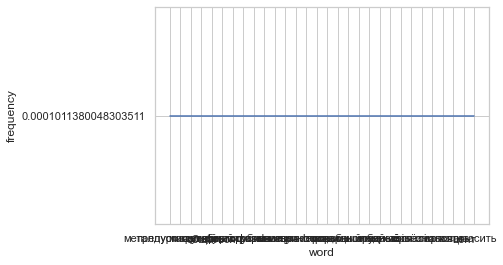

In [127]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = graph
ax = sns.lineplot(x="word", y="frequency", data=tips)

### Для всей выборки

In [8]:
corpus_all = ' '.join(list(result['message'].apply(lambda x: str(x))))
text_all = corpus_all
words_all = tokenize_n_lemmatize(text_all, stopwords=stopwords_ru)
qty_all = sum(Counter(words_all).values())
k_all = list(Counter(words_all).keys())

v_all = np.array(list(Counter(words_all).values()))/qty_all
d_all = [k_all, list(v_all)]
zip_iterator = zip(k_all,list(v_all) )

di_all = dict(zip_iterator)

In [10]:
x = Counter(words_all).most_common(20)

In [11]:
x_1 = np.array(x)

In [14]:
x_2 = x_1.transpose()

In [17]:
x_2[1]

array(['195175', '192057', '191351', '146450', '135073', '126940',
       '124633', '117400', '102275', '97868', '94715', '92915', '90092',
       '88533', '85204', '70402', '66148', '63740', '60610', '58875'],
      dtype='<U8')

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
x_2[1].astype(int)/qty_all

array([0.0084404 , 0.00830556, 0.00827503, 0.00633327, 0.00584127,
       0.00548955, 0.00538979, 0.00507699, 0.00442291, 0.00423233,
       0.00409598, 0.00401813, 0.00389605, 0.00382863, 0.00368467,
       0.00304455, 0.00286059, 0.00275645, 0.0026211 , 0.00254607])

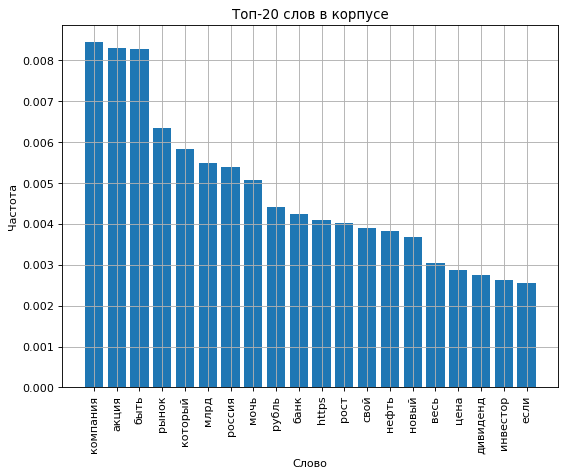

In [32]:
figure(figsize=(8, 6), dpi=80)
x = x_2[0]
y = x_2[1].astype(int)/qty_all
plt.title('Топ-20 слов в корпусе')
plt.xlabel('Слово')
plt.ylabel('Частота')
plt.xticks(rotation=90)
_ = plt.bar(x, y)
plt.grid()

In [147]:
def tfidf_all(x):
    y = tokenize_n_lemmatize(x, stopwords=stopwords_ru)
    z=[]
    for i in y: 
        z.append(di_all.get(i))
    return [y, z]

In [ ]:
result['TF_IDF'] = result['message'].apply(lambda x: tfidf_all(str(x)))